In [1]:
import torch
import numpy as np
from ANN_model import Taichung_features12_NN, Taichung_features7_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 32
RANDOM_STATE = 42

X = np.load('Grouped_by_city/taichung_features12_train.npy')
y = np.load('Grouped_by_city/taichung_target_train.npy')

X = np.delete(X, [10, 11, 6, 0, 1], axis=1)

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Total num of data: 996


In [3]:
model = Taichung_features7_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=500, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=30, threshold=0.001)

[Epoch 1/500] train_loss: 0.059665, test_loss: 0.007268 | train_mape: 35.0538, test_mape: 14.1117
[Epoch 2/500] train_loss: 0.007017, test_loss: 0.004934 | train_mape: 14.4840, test_mape: 13.9024
[Epoch 3/500] train_loss: 0.004315, test_loss: 0.003234 | train_mape: 12.2870, test_mape: 11.5817
[Epoch 4/500] train_loss: 0.004384, test_loss: 0.002944 | train_mape: 12.1318, test_mape: 10.6535
[Epoch 5/500] train_loss: 0.003335, test_loss: 0.003692 | train_mape: 10.9269, test_mape: 10.5804
[Epoch 6/500] train_loss: 0.003798, test_loss: 0.003118 | train_mape: 11.5069, test_mape: 10.4010
[Epoch 7/500] train_loss: 0.003409, test_loss: 0.002910 | train_mape: 10.8394, test_mape: 10.5271
[Epoch 8/500] train_loss: 0.003055, test_loss: 0.002881 | train_mape: 10.3925, test_mape: 10.4592
[Epoch 9/500] train_loss: 0.003419, test_loss: 0.002969 | train_mape: 10.9843, test_mape: 10.6535
[Epoch 10/500] train_loss: 0.003507, test_loss: 0.002706 | train_mape: 10.7011, test_mape: 10.1317
[Epoch 11/500] trai

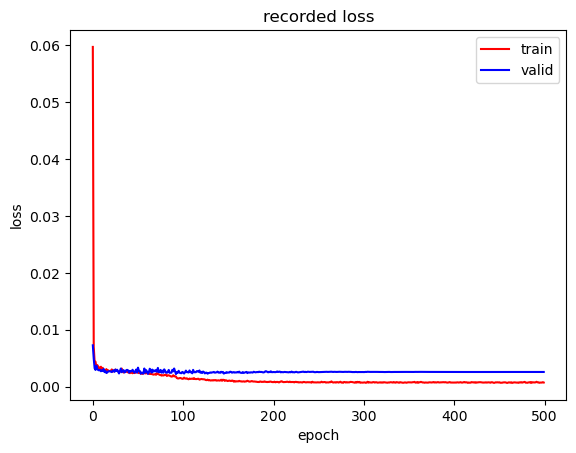

In [4]:
loss_plot(trainloss, testloss)

In [5]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/taichung_features7_model2.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

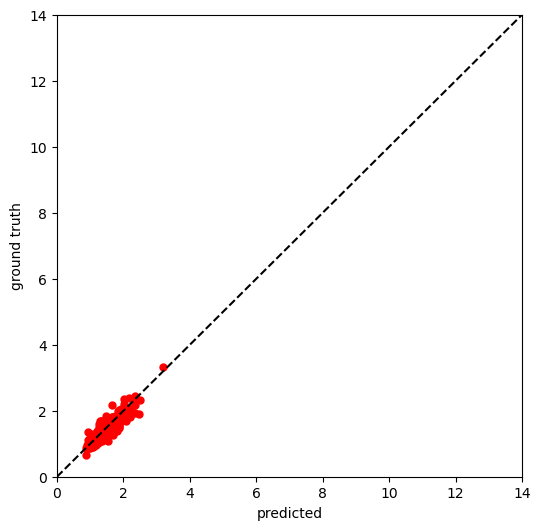

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

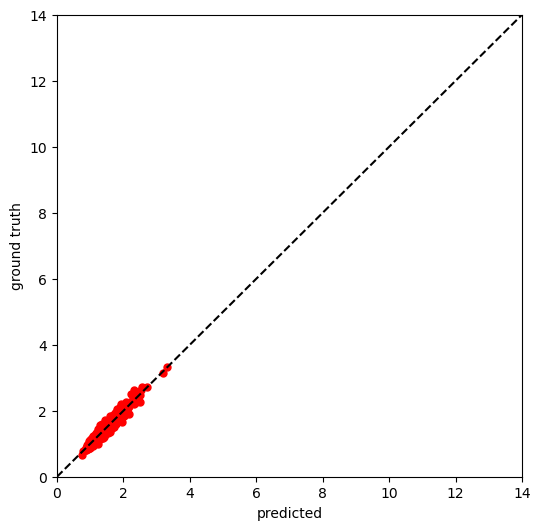

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)